In [176]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

Step 1
Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

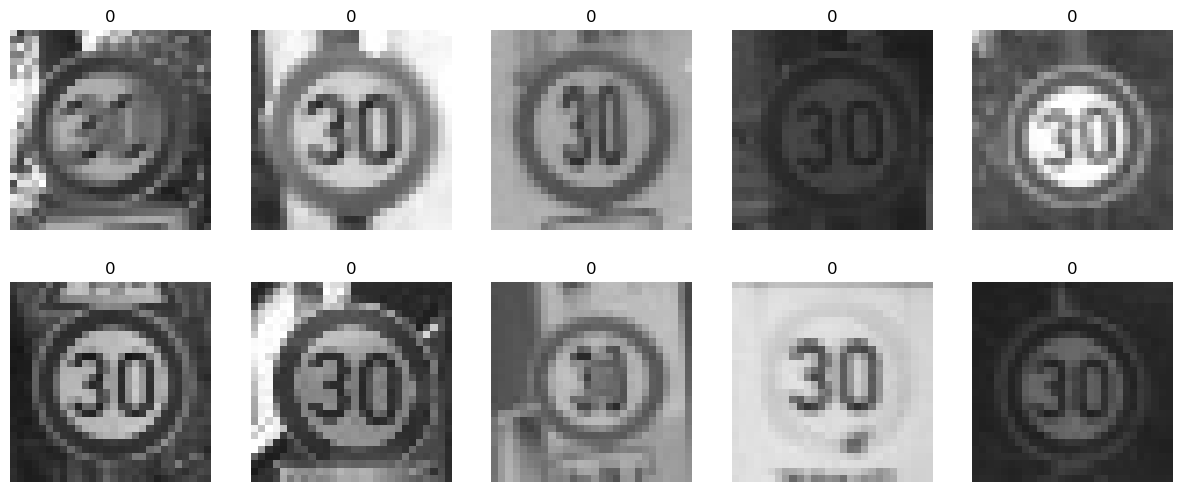

In [177]:
folder = 'subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

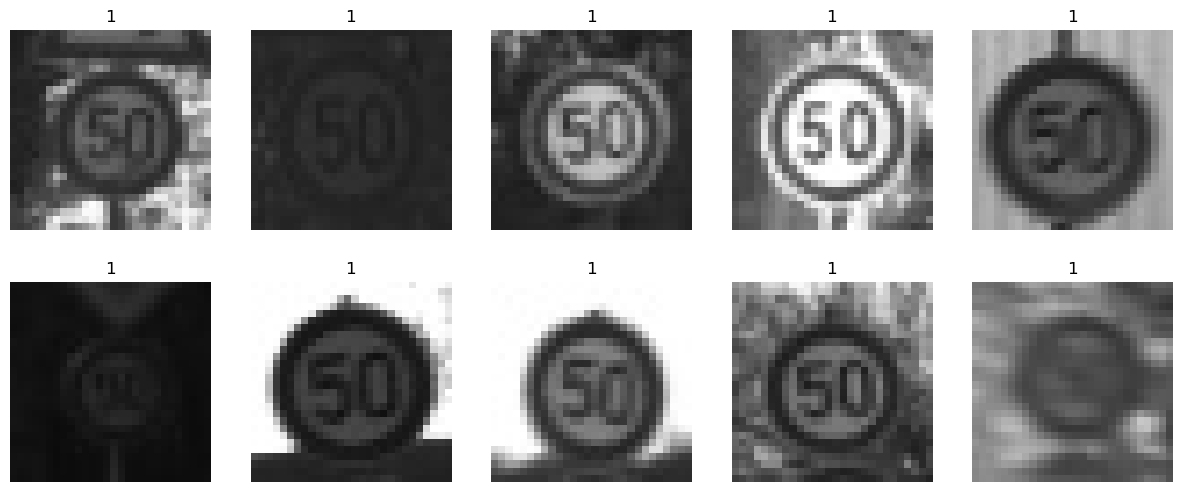

In [178]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [179]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

In [180]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

pixels = np.array([image.flatten() for image in images])/255

In [181]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="relu")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_114 (Dense)           (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Epoch 1/10
280/280 [==============================] - 0s 435us/step - loss: 0.5034
Epoch 2/10
280/280 [==============================] - 0s 382us/step - loss: 0.5034
Epoch 3/10
280/280 [==============================] - 0s 383us/step - loss: 0.5034
Epoch 4/10
280/280 [==============================] - 0s 380us/step - loss: 0.5034
Epoch 5/10
280/280 [==============================] - 0s 390us/step - loss: 0.5034
Epoch 6/10
280/280 [==============================] - 0s 459us/step - loss: 0.5034
Epoch 7/10
280/280 [==============================] - 0s 394us/step - loss: 0.5034
Epoch 8/10
280/280 [==============================] - 0s 377us/step - loss: 0.5034
Epoch 9/10
280/280 [==============================] - 0s 387us/step - loss: 0.5034
Epoch 10/10
280/280 [==============================] - 0s 379us/step - loss: 0.5034
[-0.00600516] [-0.00600516]


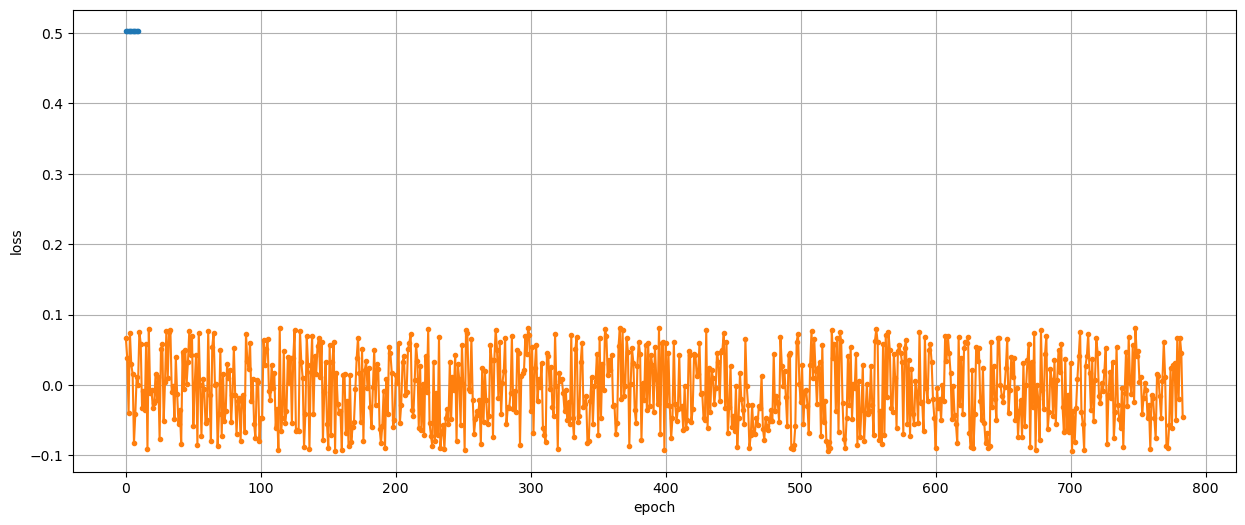

In [183]:
history = model.fit(pixels, labels, epochs=10, batch_size=16)

# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [184]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

# Flatten labels if they are not already
labels = labels.squeeze()

# Count correct predictions
correct = 0
for prediction, label in zip(predictions, labels):
    if (prediction == label).all():
        correct += 1

# Calculate and print accuracy
accuracy = correct / len(labels)

print('Accuracy', accuracy)

140/140 [==============================] - 0s 320us/step
Accuracy 0.4966442953020134


# Results
### Seems like more neuron count = less accuracy  
1 neuron: 0.9272930648769575  
10 neurons: 0.8514541387024609  
50 neurons: 0.7926174496644295  
### Here we have the best variant with 15 layers
2 layers(1 neuron each): 0.9275167785234899  
3 layers(1 neuron each): 0.8982102908277405  
10 layers(1 neuron each): 0.9261744966442953  
15 layers(1 neuron each): 0.9302013422818792  
20 layers(1 neuron each): 0.9284116331096197
### Increasing epochs greatly increase accuracy
50 epochs(1 neuron): 0.967337807606264  
100 epochs(1 neuron): 0.9798657718120806
### Decreasing batch size also give nice results
1 neuron, batch size 16: 0.9574944071588367  
1 neuron, batch size 16, 20 epochs: 0.9689038031319911

### Activation relu
1 neuron, activation relu: 0.4966442953020134

#### In conclusion, I'd say that the best accuracy I achieved here was 100 epochs. More neurons = worse accuracy. RELU gives us really bad results here. Is it because of overfitting? don't know if I understood this correctly.

